In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [2]:
# Import the data
lending_df = pd.read_csv('lending_data.csv')
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Prediction

According to Google, Logistic regression performs better when the number of noise variables is less than or equal to the number of explanatory variables and the random forest has a higher true and false positive rate as the number of explanatory variables increases in a dataset.

I feel the logistic regression will perform better considering the data set that we are dealing with.

## Logistic Regression Model

In [3]:
 # Define the X (features) and y (target) sets
X = lending_df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]
y = lending_df["loan_status"]

In [4]:
print("Shape: ", X.shape, y.shape)

Shape:  (77536, 7) (77536,)


In [5]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [7]:
 classifier.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Train a Logistic Regression model print the model score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [9]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [10]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (563 + 18663) / (563 + 102 + 18663 + 56)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918489475856377


C:\Users\chisi\AppData\Local\Temp/ipykernel_76520/1391006535.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  lending_df.hist(ax=ax)


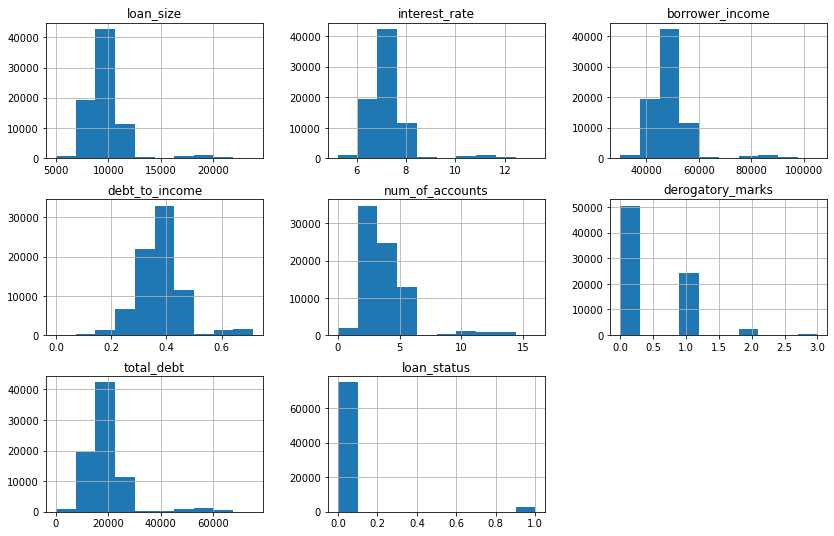

In [11]:
fig, ax = plt.subplots(figsize=(14,9))
lending_df.hist(ax=ax)
plt.show()

## Random Forest Classifier Model

In [12]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Train a Random Forest Classifier model and print the model score
rand_clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {rand_clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rand_clf.score(X_test_scaled, y_test)}') 


Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


In [15]:
rand_clf.fit(X_train,y_train)
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.991642591828312
[[18665   100]
 [   62   557]]


## Conclusion

Both models performed almost the same. Logistic regression model of 0.9918 compared to the Random Forest model of 0.9917. Based on this i would say the Logistic Regression model performed better.

Also the accuracy scores from the Logistic regression model were higher than the Random forest model ie 0.9918 as against 0.9916. This is further confirmed with the number of true positives reducing from 563 in the logistic regression model to 557 in the Random Forest model 